In [1]:
##importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
##chnage the working directory and check it
os.getcwd()

'C:\\Users\\MR321NC\\personal data'

In [3]:
##load the data set
dataset_full = pd.read_csv('loan_data.csv')

C:\Users\MR321NC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
####checking shape####
dataset_full.shape

(466285, 74)

In [5]:
##set display to maximum 80 columns and 80 rows
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

In [6]:
##checking head
dataset_full.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
####checking column names####
dataset_full.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [8]:
##dropping unnecessary columns based on data dictonary file
dataset_full = dataset_full.drop(['id', 'member_id','grade','emp_title','url','desc','title', 'zip_code', 'application_type','earliest_cr_line'], axis='columns')

In [9]:
####checking 1st 5 rows (head)####
dataset_full.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
##checking data types of columns
dataset_full.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util                     float64
total_acc                

In [11]:
##checking 5 point summary
dataset_full.select_dtypes(include=['int64','float64']).describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,

In [12]:
##checking null values
dataset_full.isnull().any()

loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
installment                    False
sub_grade                      False
emp_length                      True
home_ownership                 False
annual_inc                      True
verification_status            False
issue_d                        False
loan_status                    False
pymnt_plan                     False
purpose                        False
addr_state                     False
dti                            False
delinq_2yrs                     True
inq_last_6mths                  True
mths_since_last_delinq          True
mths_since_last_record          True
open_acc                        True
pub_rec                         True
revol_bal                      False
revol_util                      True
total_acc                       True
initial_list_status            False
o

In [13]:
##checking percentage of missing values
dataset_full.isnull().sum() * 100 / len(dataset_full)

loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
sub_grade                        0.000000
emp_length                       4.505399
home_ownership                   0.000000
annual_inc                       0.000858
verification_status              0.000000
issue_d                          0.000000
loan_status                      0.000000
pymnt_plan                       0.000000
purpose                          0.000000
addr_state                       0.000000
dti                              0.000000
delinq_2yrs                      0.006219
inq_last_6mths                   0.006219
mths_since_last_delinq          53.690554
mths_since_last_record          86.566585
open_acc                         0.006219
pub_rec                          0.006219
revol_bal                        0

In [14]:
##removing empty columns
dataset_full = dataset_full.drop(['mths_since_last_record', 'mths_since_last_delinq','next_pymnt_d','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint', 'open_acc_6m', 'open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m','issue_d','last_pymnt_d','last_credit_pull_d'], axis='columns')

In [15]:
##again checking percentage of missing values
dataset_full.isnull().sum() * 100 / len(dataset_full)

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
sub_grade                      0.000000
emp_length                     4.505399
home_ownership                 0.000000
annual_inc                     0.000858
verification_status            0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.006219
inq_last_6mths                 0.006219
open_acc                       0.006219
pub_rec                        0.006219
revol_bal                      0.000000
revol_util                     0.072917
total_acc                      0.006219
initial_list_status            0.000000
out_prncp                      0.000000


In [16]:
##filling null values through median
dataset_full.fillna(dataset_full.median().round(1), inplace=True)

C:\Users\MR321NC\AppData\Local\Temp/ipykernel_11040/1441750139.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_full.fillna(dataset_full.median().round(1), inplace=True)


In [17]:
##again checking percentage of missing values
dataset_full.isnull().sum() * 100 / len(dataset_full)

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
sub_grade                     0.000000
emp_length                    4.505399
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.000000
total_acc                     0.000000
initial_list_status           0.000000
out_prncp                     0.000000
out_prncp_inv            

In [18]:
##droping categorical null values
dataset_full=dataset_full.dropna(axis=0, how='any')

In [19]:
##checking shape
dataset_full.shape

(445277, 40)

In [20]:
##checking null values
dataset_full.isnull().any()

loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
sub_grade                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
loan_status                   False
pymnt_plan                    False
purpose                       False
addr_state                    False
dti                           False
delinq_2yrs                   False
inq_last_6mths                False
open_acc                      False
pub_rec                       False
revol_bal                     False
revol_util                    False
total_acc                     False
initial_list_status           False
out_prncp                     False
out_prncp_inv                 False
total_pymnt                   False
total_pymnt_inv             

In [21]:
##rest index
dataset_full.reset_index(drop=True,inplace=True)

In [22]:
##checking unique vlaues of dependent variable
pd.unique(dataset_full["loan_status"])

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [23]:
##checking class imbalance of dependent varibale
dataset_full["loan_status"].value_counts()

Current                                                212545
Fully Paid                                             178388
Charged Off                                             40153
Late (31-120 days)                                       6499
In Grace Period                                          3044
Does not meet the credit policy. Status:Fully Paid       1969
Late (16-30 days)                                        1149
Default                                                   784
Does not meet the credit policy. Status:Charged Off       746
Name: loan_status, dtype: int64

In [24]:
##creating new dependent variable
y= dataset_full["loan_status"]
y_new=[]
for i in range(len(y)):
    if y[i]=="Current":
        y_new.append(0)
    elif y[i]=="Default":
        y_new.append(1)
    elif y[i]=="Fully Paid":
        y_new.append(2)
    elif y[i]=="Charged Off":
        y_new.append(3)
    elif y[i]=="Late (16-30 days)":
        y_new.append(4)
    elif y[i]=="Late (31-120 days)":
        y_new.append(5)
    elif y[i]=="In Grace Period":
        y_new.append(6)
    elif y[i]=="Does not meet the credit policy. Status:Fully Paid":
        y_new.append(7)
    else:
        y_new.append(8)

In [25]:
##checking length of dependent variable and dataset
print(len(y_new))
print(len(dataset_full))

445277
445277


In [26]:
##checking class imbalance
pd.DataFrame(y_new).value_counts()

0    212545
2    178388
3     40153
5      6499
6      3044
7      1969
4      1149
1       784
8       746
dtype: int64

In [27]:
##dropping dependent variable from dataset
dataset_full = dataset_full.drop('loan_status', axis='columns')

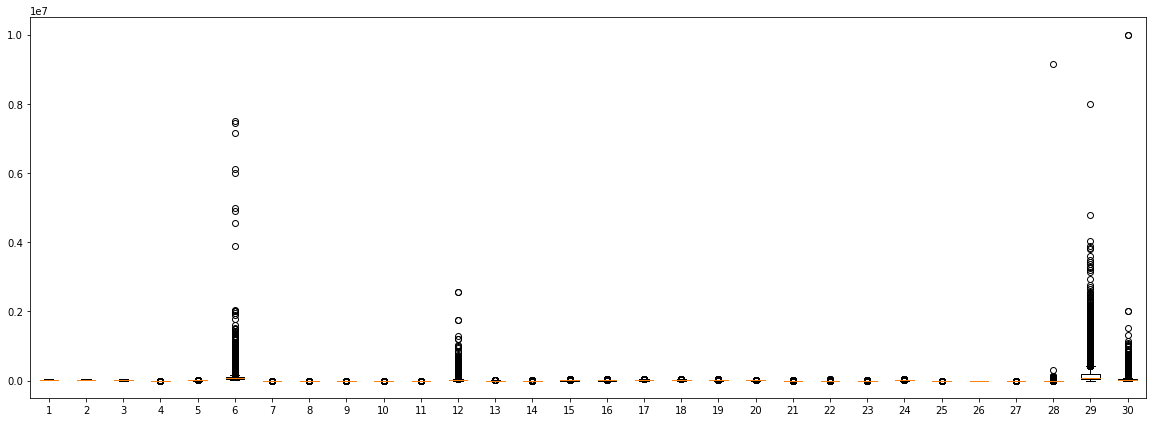

In [28]:
##checking outliers
numeric_data = dataset_full.select_dtypes(include=['int64','float64'])
fig = plt.figure(figsize =(20, 7))
plt.boxplot(numeric_data)
plt.show()

In [29]:
##removing outliers through IQR
numeric_data_columns = dataset_full.select_dtypes(include=['int64','float64']).columns

for i in numeric_data_columns:
    Q1= dataset_full[i].quantile(0.25)
    Q3= dataset_full[i].quantile(0.75)
    IQR= Q3-Q1
    lower_limit= Q1-1.5*IQR
    upper_limit= Q3+1.5*IQR
    dataset_full.loc[dataset_full[i]<lower_limit,i]=lower_limit
    dataset_full.loc[dataset_full[i]>upper_limit,i]=upper_limit

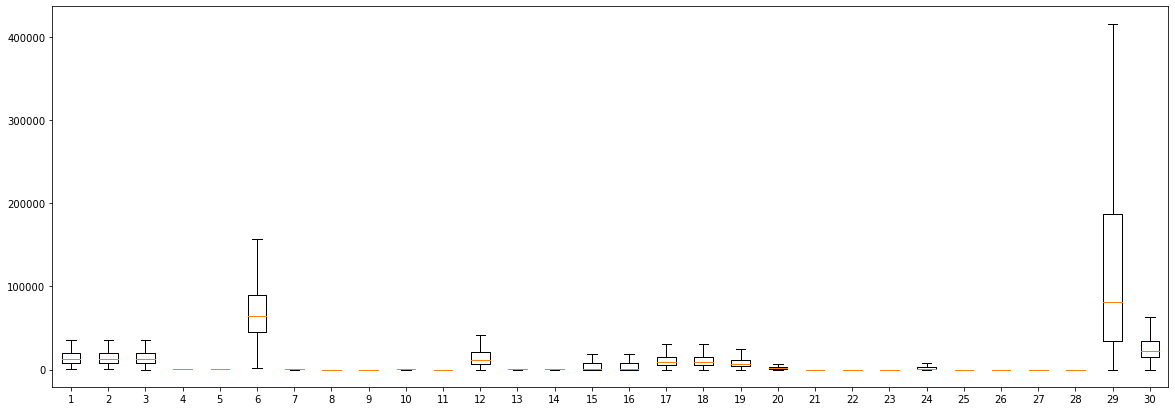

In [30]:
##again checking outliers
numeric_data = dataset_full.select_dtypes(include=['int64','float64'])
fig = plt.figure(figsize =(20, 7))
plt.boxplot(numeric_data)
plt.show()

In [31]:
##checking head
dataset_full.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.0,0.0,171.62,0.0,1,0.0,0.0,81539.0,22800.0
1,2500,2500,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,2.5,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,0.0,0.0,119.66,0.0,1,0.0,0.0,81539.0,22800.0
2,2400,2400,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.0,0.0,649.91,0.0,1,0.0,0.0,81539.0,22800.0
3,10000,10000,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,0.0,0.0,0.0,357.48,0.0,1,0.0,0.0,81539.0,22800.0
4,3000,3000,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,1,0.0,0.0,81539.0,22800.0


In [32]:
##finding values count of term variable
dataset_full["term"].value_counts()

 36 months    320757
 60 months    124520
Name: term, dtype: int64

In [33]:
##finding values count of sub_grade variable
dataset_full["sub_grade"].value_counts()

B3    30278
B4    29157
C1    25693
C2    25519
B2    25407
C3    24146
B5    24066
C4    22983
B1    21892
C5    21128
A5    20908
D1    18320
A4    18232
D2    16252
D3    14173
D4    13442
A3    12028
D5    11012
A2    10509
A1    10107
E1     8590
E2     8308
E3     6650
E4     5741
E5     4849
F1     3751
F2     2881
F3     2602
F4     1985
F5     1459
G1     1062
G2      797
G3      565
G4      412
G5      373
Name: sub_grade, dtype: int64

In [34]:
##finding values count of emp length variable
dataset_full["emp_length"].value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [35]:
##feature engineering-- converting categorical into neumeric form of emp_length
emp_length_data=dataset_full["emp_length"]
emp_length=[]
for i in range(len(emp_length_data)):
    if emp_length_data[i]=="< 1 year":
        emp_length.append(0)
    elif emp_length_data[i]=="1 year":
        emp_length.append(1)
    elif emp_length_data[i]=="2 years":
        emp_length.append(2)
    elif emp_length_data[i]=="3 years":
        emp_length.append(3)
    elif emp_length_data[i]=="4 years":
        emp_length.append(4)
    elif emp_length_data[i]=="5 years":
        emp_length.append(5)
    elif emp_length_data[i]=="6 years":
        emp_length.append(6)
    elif emp_length_data[i]=="7 years":
        emp_length.append(7)
    elif emp_length_data[i]=="8 years":
        emp_length.append(8)
    elif emp_length_data[i]=="9 years":
        emp_length.append(9)
    else:
        emp_length.append(10)

In [36]:
dataset_full["emp_length"]=emp_length

In [37]:
##describe dataset
dataset_full.describe(include="all")

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,445277.000000,445277.000000,445277.000000,445277,445277.000000,445277.000000,445277,445277.000000,445277,445277.000000,445277,445277,445277,445277,445277.000000,445277.0,445277.000000,445277.000000,445277.0,445277.000000,445277.000000,445277.000000,445277,445277.000000,445277.000000,445277.000000,445277.000000,445277.000000,445277.000000,445277.0,445277.0,445277.0,445277.000000,445277.0,445277.0,445277.0,445277.0,445277.000000,445277.000000
unique,NaN,NaN,NaN,2,NaN,NaN,35,NaN,6,NaN,3,2,14,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,36 months,NaN,NaN,B3,NaN,MORTGAGE,NaN,Verified,n,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,320757,NaN,NaN,30278,NaN,226012,NaN,152243,445268,262854,68563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,14448.167152,14421.955098,14349.824525,NaN,13.814830,432.210185,NaN,5.993330,NaN,71296.290932,NaN,NaN,NaN,NaN,17.160563,0.0,0.725875,11.139304,0.0,14822.316648,56.282077,24.999517,NaN,4226.581213,4224.991778,11415.106836,11340.095448,8727.812296,2431.624887,0.0,0.0,0.0,2147.678901,0.0,1.0,0.0,0.0,125160.498094,26775.206891
std,8298.614619,8286.560963,8312.073805,NaN,4.339551,234.432893,NaN,3.627044,NaN,33917.105558,NaN,NaN,NaN,NaN,7.822014,0.0,0.862920,4.656056,0.0,10923.672598,23.679485,11.224931,NaN,5802.016117,5800.148525,7536.273911,7522.351402,6370.533974,1916.093038,0.0,0.0,0.0,2863.268087,0.0,0.0,0.0,0.0,115457.021488,16165.610540
min,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,0.000000,NaN,1896.000000,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,NaN,10.990000,259.990000,NaN,3.000000,NaN,45500.000000,NaN,NaN,NaN,NaN,11.330000,0.0,0.000000,8.000000,0.0,6482.000000,39.400000,17.000000,NaN,0.000000,0.000000,5637.390000,5584.850000,3779.330000,970.490000,0.0,0.0,0.0,317.350000,0.0,1.0,0.0,0.0,34808.000000,15200.000000
50%,12375.000000,12300.000000,12175.000000,NaN,13.660000,383.000000,NaN,6.000000,NaN,64500.000000,NaN,NaN,NaN,NaN,16.810000,0.0,0.000000,10.000000,0.0,11880.000000,57.700000,24.000000,NaN,282.620000,282.420000,9556.420000,9489.230000,6962.430000,1841.530000,0.0,0.0,0.0,553.580000,0.0,1.0,0.0,0.0,81539.000000,22800.000000
75%,20000.000000,20000.000000,20000.000000,NaN,16.490000,570.840000,NaN,10.000000,NaN,90000.000000,NaN,NaN,NaN,NaN,22.700000,0.0,1.000000,14.000000,0.0,20494.000000,74.800000,32.000000,NaN,7437.530000,7435.520000,15492.910000,15408.770000,12000.000000,3341.560000,0.0,0.0,0.0,3335.880000,0.0,1.0,0.0,0.0,187494.000000,34500.000000


In [38]:
##finding values count of home ownership variable
dataset_full["home_ownership"].value_counts()

MORTGAGE    226012
RENT        181018
OWN          38018
OTHER          179
NONE            49
ANY              1
Name: home_ownership, dtype: int64

In [39]:
##finding values count of verification status variable
dataset_full["verification_status"].value_counts()

Verified           152243
Not Verified       147281
Source Verified    145753
Name: verification_status, dtype: int64

In [40]:
##finding values count of purpose variable
dataset_full["purpose"].value_counts()

debt_consolidation    262854
credit_card            98963
home_improvement       25017
other                  22320
major_purchase          9385
small_business          6848
car                     5168
medical                 4335
moving                  2829
vacation                2326
wedding                 2311
house                   2177
educational              413
renewable_energy         331
Name: purpose, dtype: int64

In [41]:
##finding values count of addr state variable
dataset_full["addr_state"].value_counts()

CA    68563
NY    38406
TX    35178
FL    29861
IL    17854
NJ    17434
PA    15732
OH    14465
GA    14294
VA    13756
NC    11986
MA    10764
MI    10738
MD    10549
AZ    10065
WA    10022
CO     9379
MN     7863
MO     7129
CT     6919
IN     6220
NV     6098
WI     5659
TN     5653
OR     5579
AL     5513
SC     5263
LA     5238
KY     4189
KS     4004
OK     3918
UT     3332
AR     3266
NM     2416
HI     2398
WV     2225
NH     2154
RI     1982
DC     1401
MT     1322
AK     1202
DE     1200
MS     1150
WY     1089
SD      945
VT      862
IA       14
NE       13
ID       11
ME        4
Name: addr_state, dtype: int64

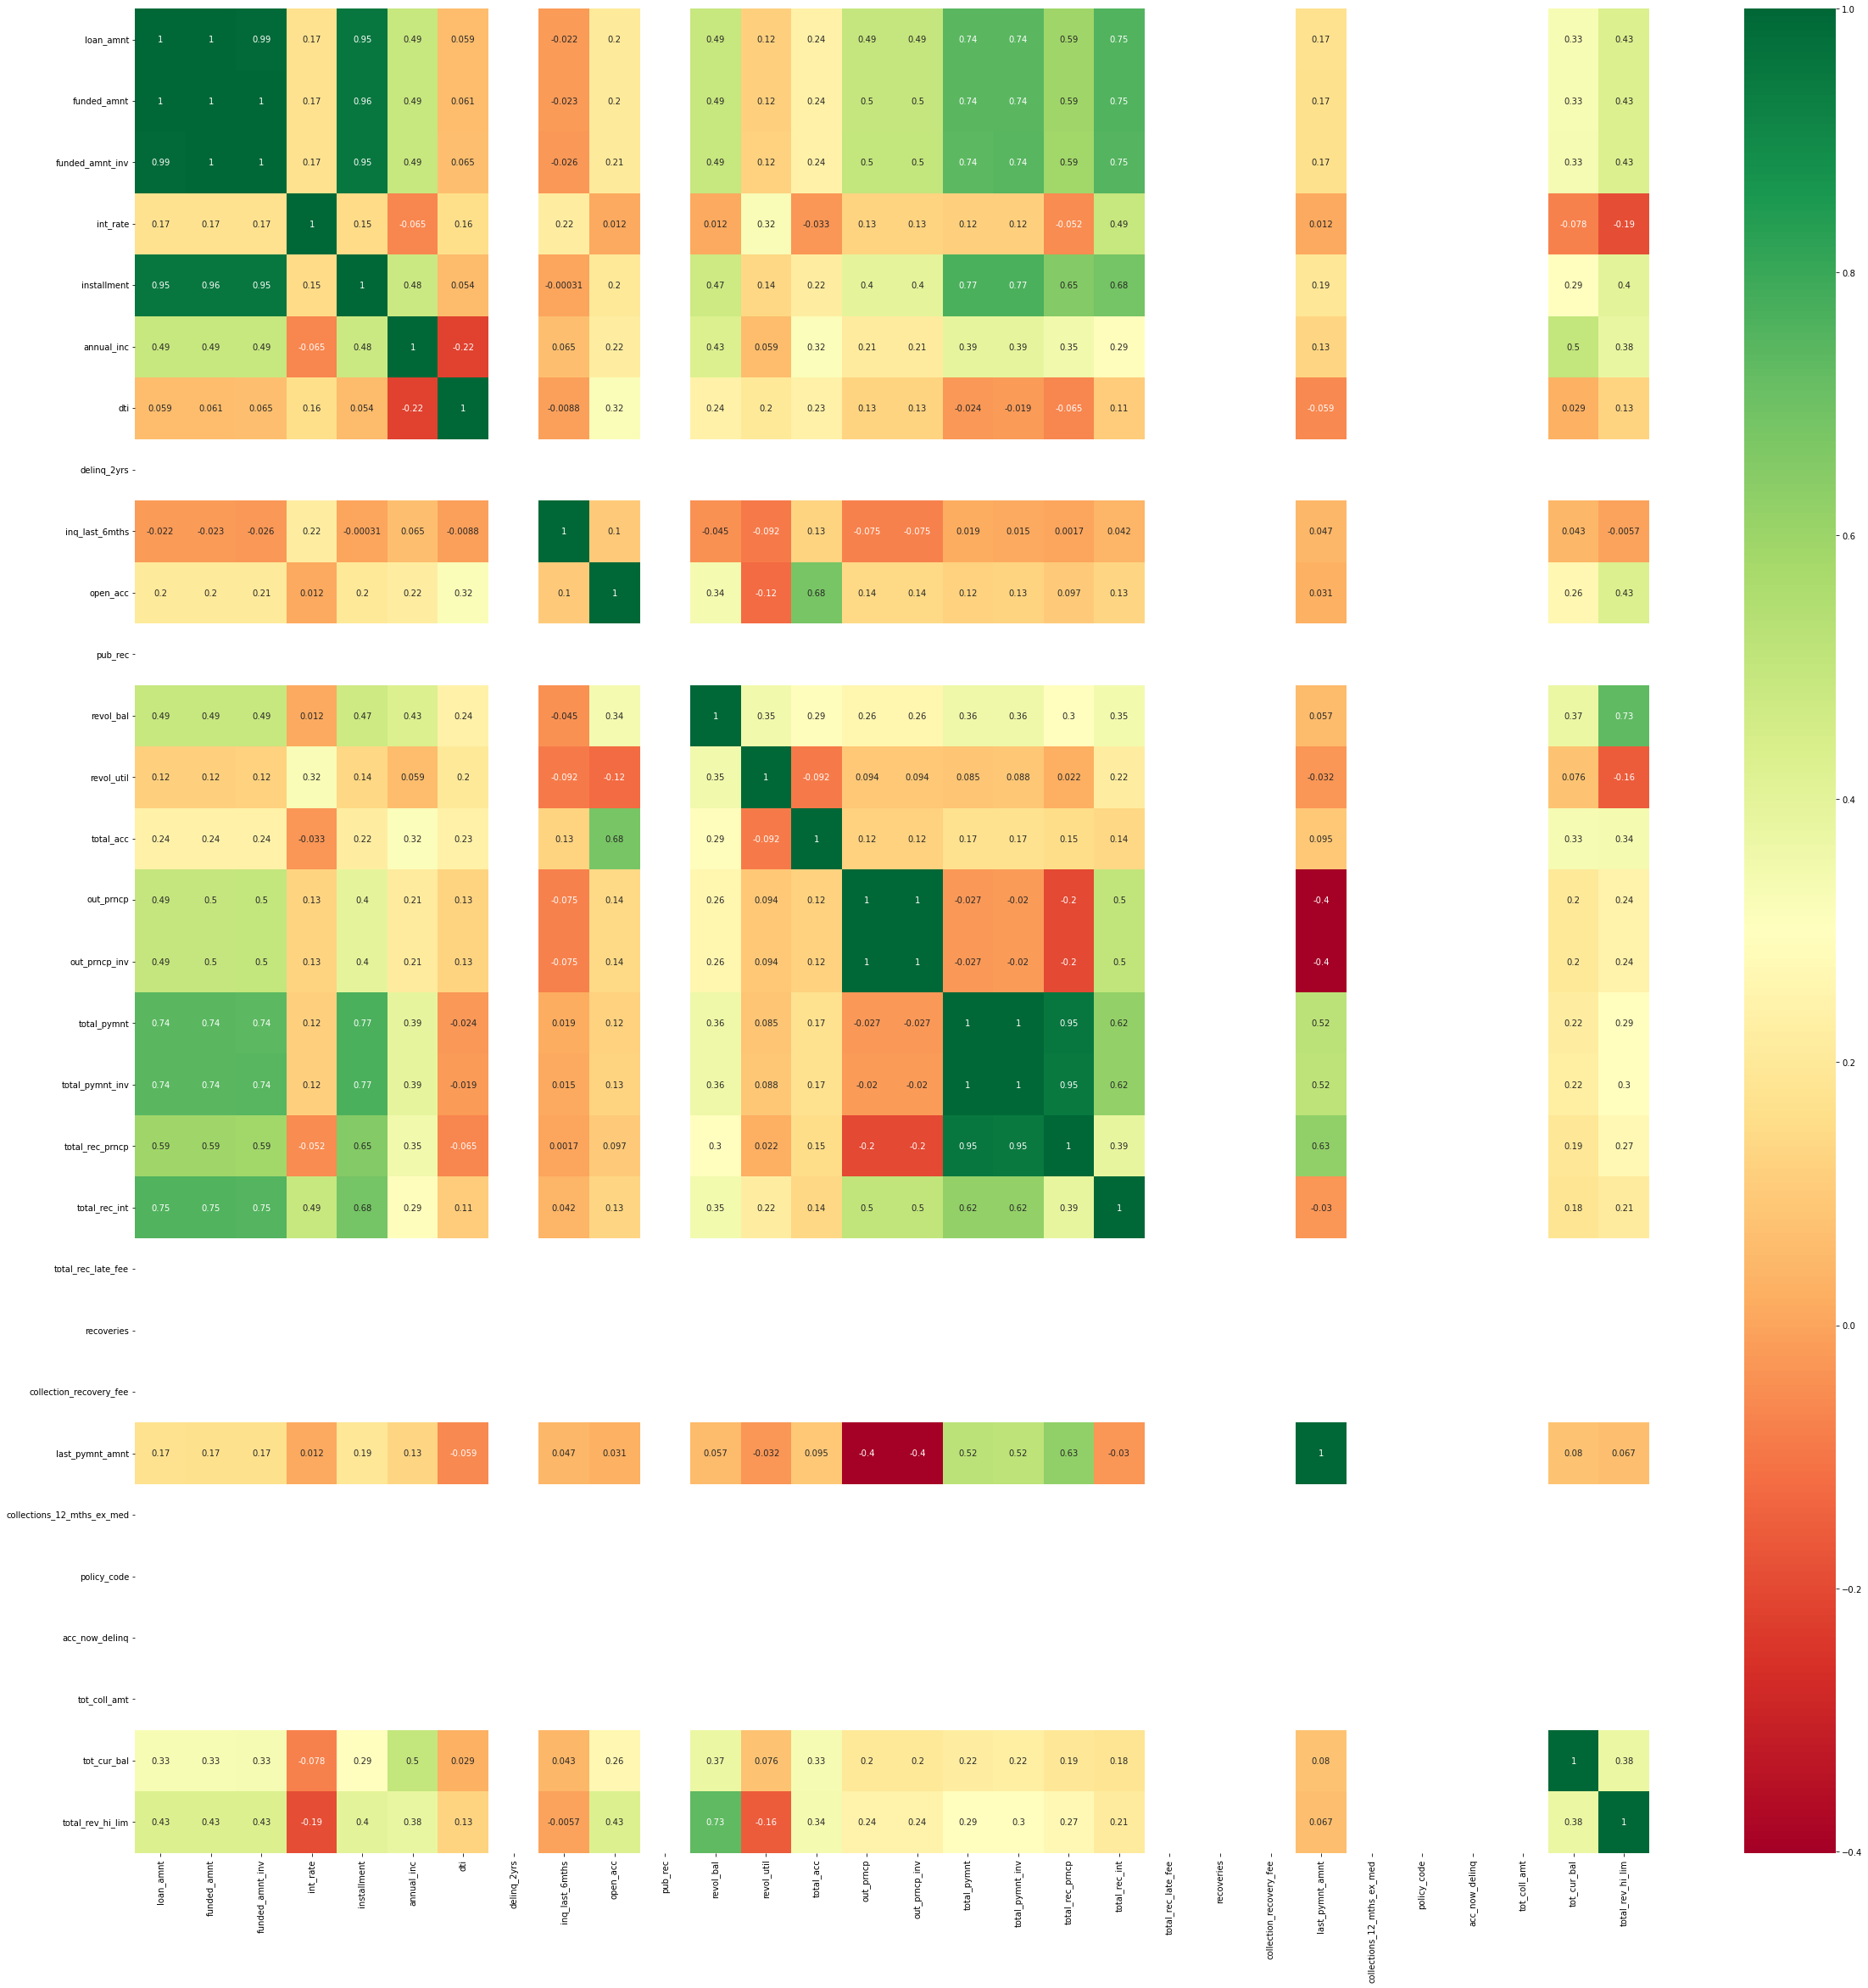

In [42]:
##multivariate analysis heatmap
corrmat = numeric_data.corr()
top_corr_feature= corrmat.index
plt.figure(figsize=(40,40))
g= sns.heatmap(numeric_data[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [43]:
##removing columns based of coorelation
dataset_full = dataset_full.drop(['funded_amnt','funded_amnt_inv','total_pymnt_inv','out_prncp','total_rec_prncp'], axis='columns')

In [44]:
dataset_full.shape

(445277, 34)

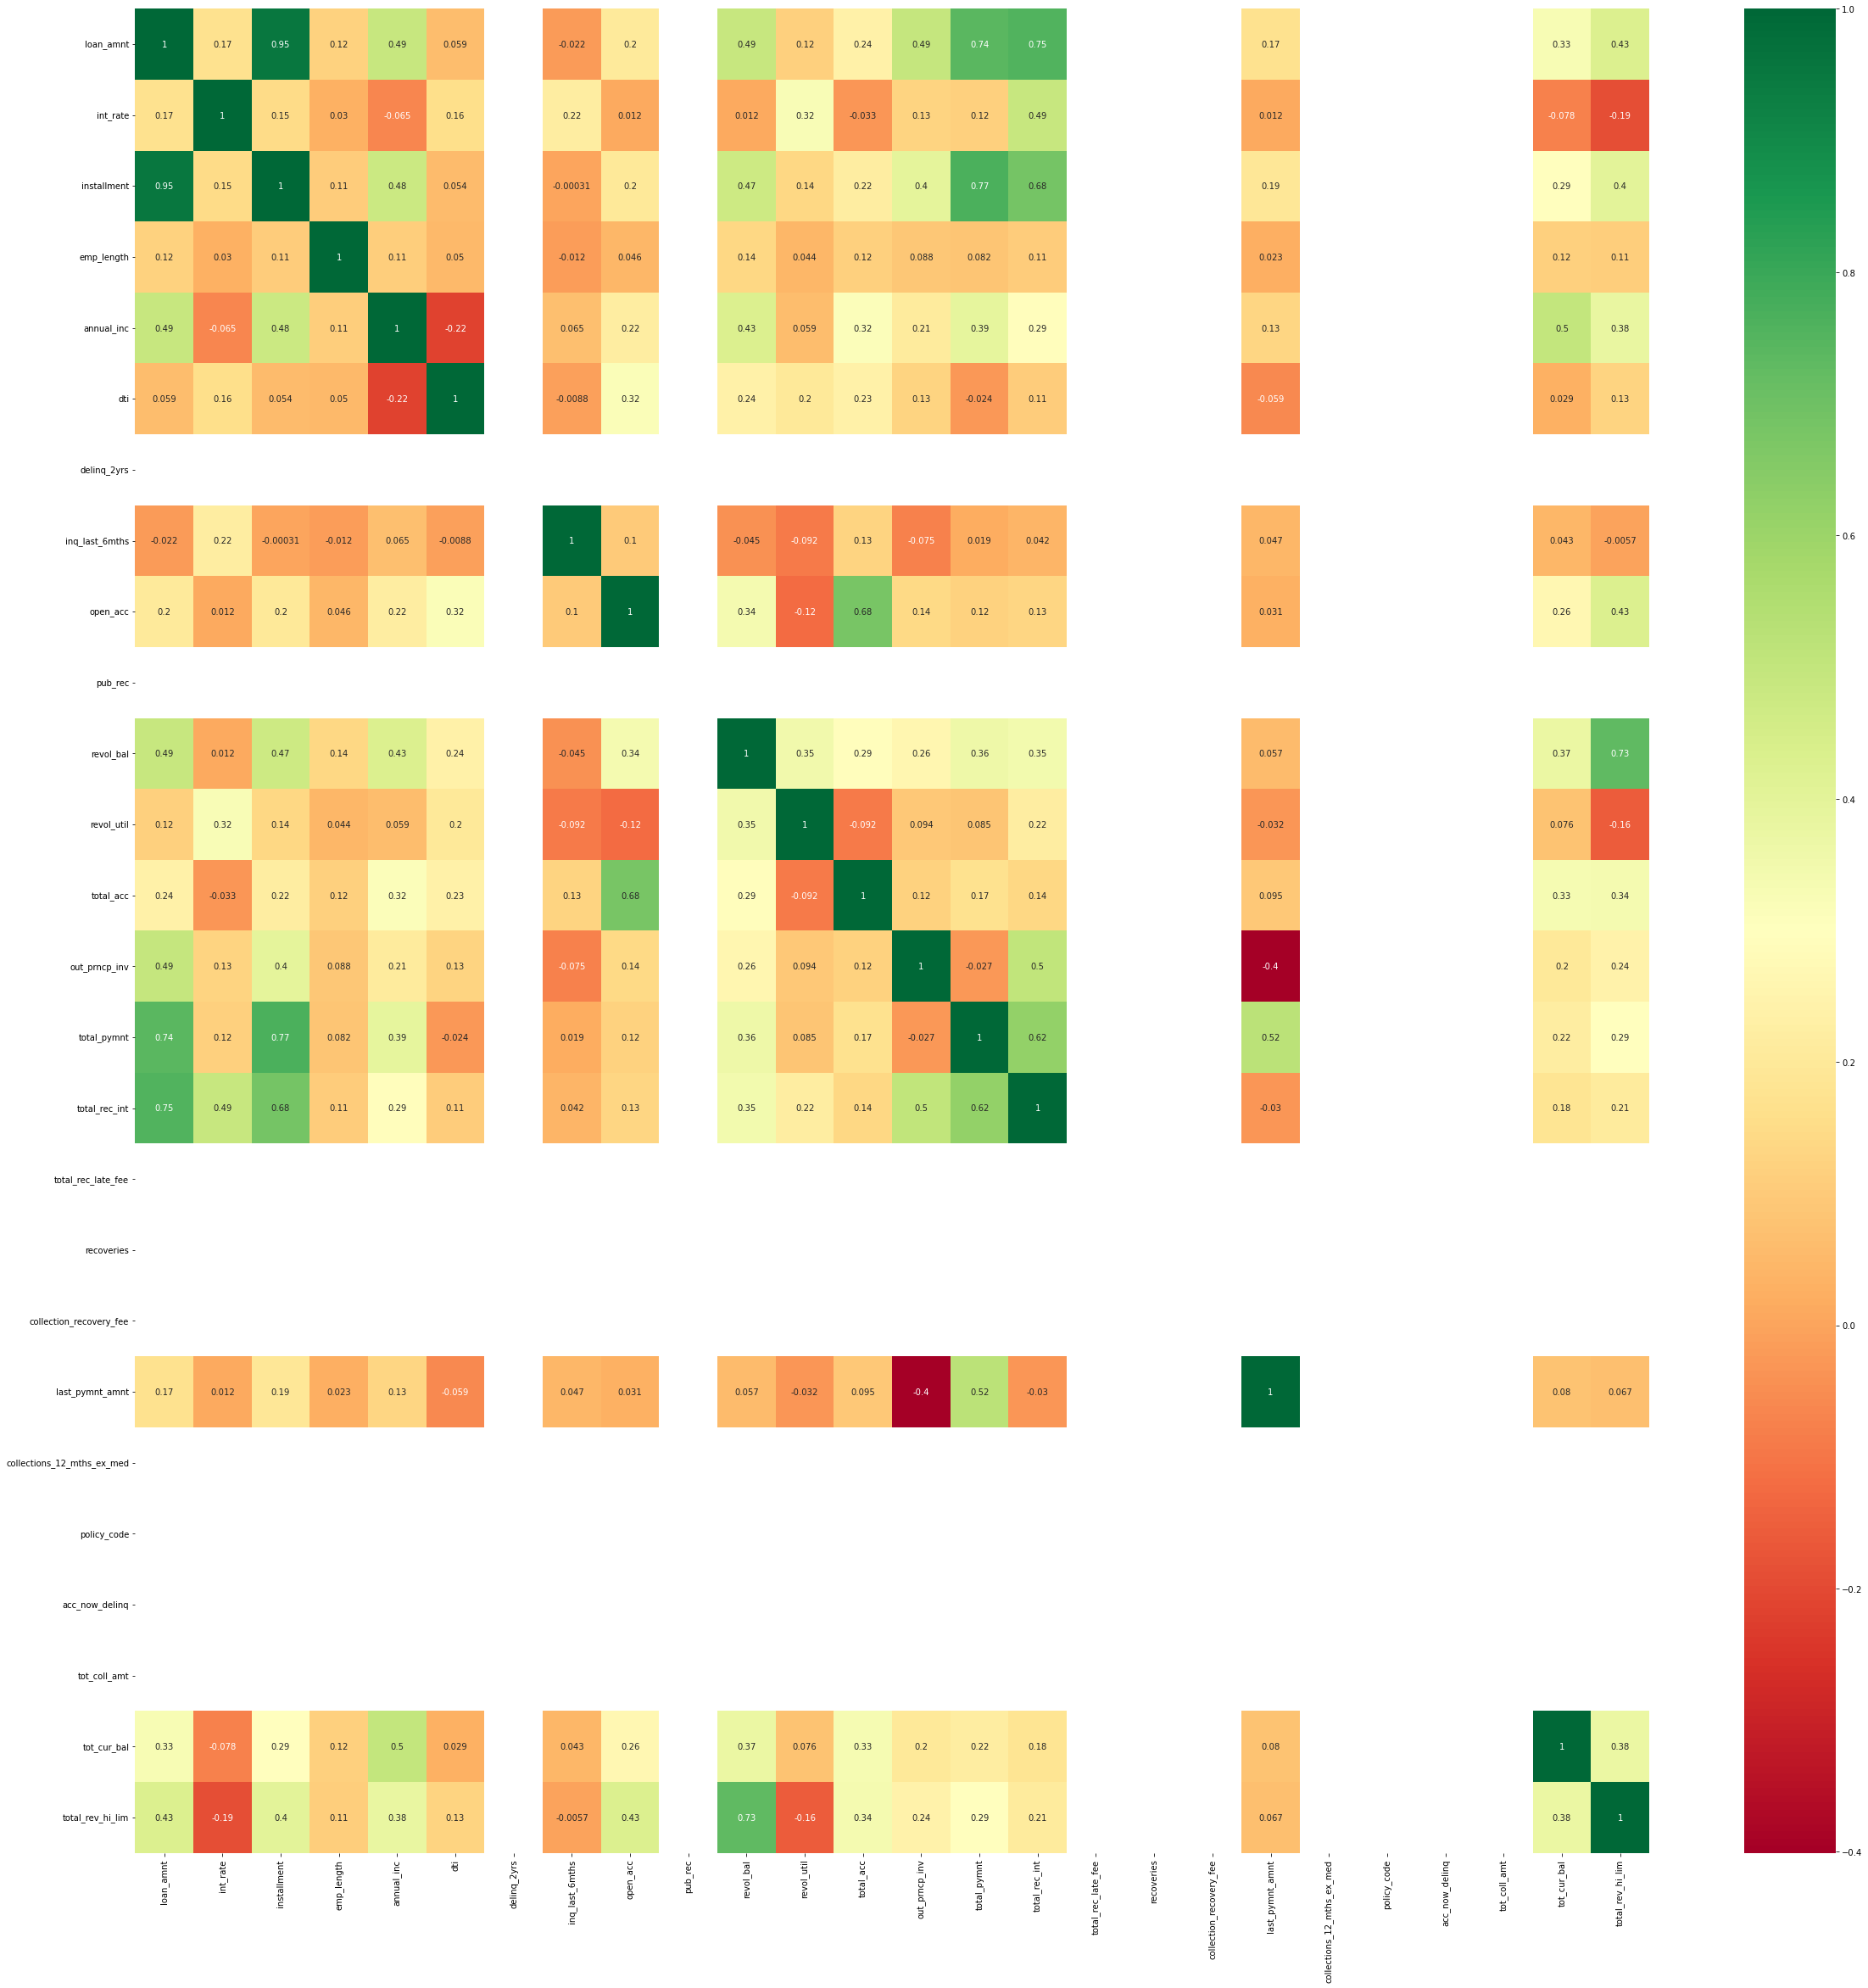

In [45]:
##multivariate analysis
numeric_data = dataset_full.select_dtypes(include=['int64','float64'])
corrmat = numeric_data.corr()
top_corr_feature= corrmat.index
plt.figure(figsize=(40,40))
g= sns.heatmap(numeric_data[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [46]:
##converting categorical values into numerics through onehot encoding
x= pd.get_dummies(dataset_full,drop_first=True)

In [48]:
# Data balancing through SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# fit predictor and target variable
x_nm, y_nm = smote.fit_resample(x, y_new)

AttributeError: 'list' object has no attribute 'values_count'

In [51]:
##checking data balance
print(len(x_nm))
print(len(y_nm))
print(y_nm.count(0))
print(y_nm.count(1))
print(y_nm.count(2))
print(y_nm.count(3))
print(y_nm.count(4))
print(y_nm.count(5))
print(y_nm.count(6))
print(y_nm.count(7))
print(y_nm.count(8))

1912905
1912905
212545
212545
212545
212545
212545
212545
212545
212545
212545


In [52]:
##converting into array
x= x_nm.values
y_new= np.array(y_nm)

In [53]:
##checking independent variable
x

array([[5.00000000e+03, 1.06500000e+01, 1.62870000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50000000e+03, 1.52700000e+01, 5.98300000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.40000000e+03, 1.59600000e+01, 8.43300000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.51230000e+04, 1.36179668e+01, 4.75701214e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.62200000e+03, 1.58351204e+01, 1.05116290e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.42380000e+04, 1.08322116e+01, 4.65357488e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [54]:
##checking dependent variable
y_new

array([2, 3, 2, ..., 8, 8, 8])

In [55]:
##train test split
X_train, X_test, y_train, y_test = train_test_split(x, y_new, test_size = 0.3, random_state = 0)

In [56]:
##feature scaling independent variables
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [57]:
##making Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [58]:
##predicting Result on test set
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [8 8]
 ...
 [3 3]
 [1 1]
 [8 8]]


In [64]:
##finding accuracy and making confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: ",accuracy_score(y_test, y_pred))

[[62409    38    20     3    56   716   216     0     0]
 [  167 63686     0     1     0    12     1     0     0]
 [   32     0 61984   901     0     0     0   847     7]
 [   51     0  1507 62083     0     0     0   193   400]
 [  272     1     0     0 63665    40    17     0     0]
 [ 2157   142     4     1   242 60520   435     0     0]
 [  856    35     3     0    62   601 62031     0     0]
 [    0     0   163     8     0     0     0 63942     1]
 [    0     0    10    45     0     0     0     7 63282]]
Accuracy:  0.9821040231968104


In [65]:
##finding precision of all classes
from sklearn.metrics import precision_score
print("precision: ",precision_score(y_test, y_pred, average=None))

precision:  [0.94639391 0.99661982 0.97319873 0.98478792 0.9943772  0.97787975
 0.98933014 0.98388958 0.99359397]


In [66]:
##finding recall of all classes
from sklearn.metrics import recall_score
print("recall: ",recall_score(y_test, y_pred, average=None))

recall:  [0.98346938 0.99716599 0.97197786 0.96651306 0.99484335 0.95305586
 0.97551425 0.99731728 0.99902122]


In [67]:
##exporting the model
import pickle
pickle.dump(classifier, open('defaulter_predictor_random_forest_model.pkl', 'wb'))

In [68]:
##exporting the standard scaller
import pickle
pickle.dump(scaler, open('defaulter_predictor_scaler.pkl', 'wb'))